In [9]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

%matplotlib inline
sns.set()

In [10]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

In [11]:
# View head
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


# Why Feature Engineer at all?

You perform feature engineering to extract more information from your data, so that you can up your game when building models.

# Titanic's Passenger Titles

Suddenly, you see different titles emerging! In other words, this column contains strings or text that contain titles, such as 'Mr', 'Master' and 'Dona'. These titles of course give you information on social status, profession, etc., which in the end could tell you something more about survival.

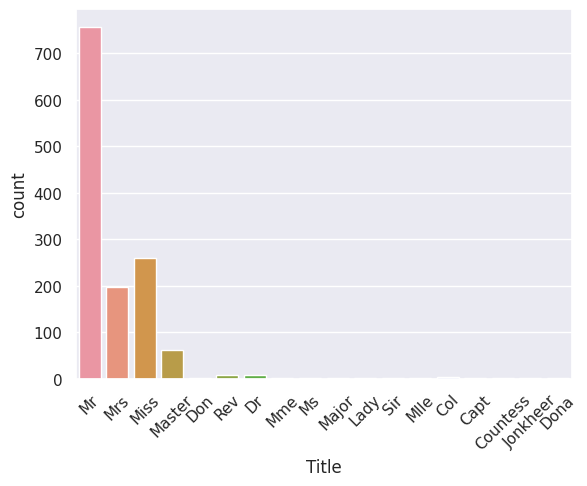

In [12]:
data['Title'] = data.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

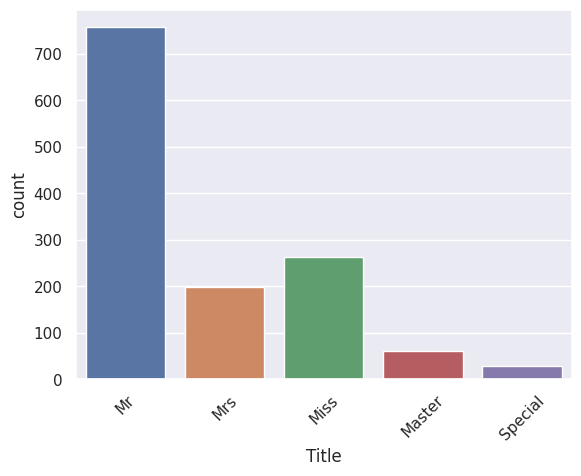

In [13]:
data['Title'] = data['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr',
                                            'Major', 'Lady', 'Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'],'Special')
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);


This is what your newly engineered feature 'Title' looks like!

# Passenger's Cabins

When you loaded in the data and inspected it, you saw that there are several NaNs or missing values in the 'Cabin' column. 

It is reasonable to presume that those NaNs didn't have a cabin, which could tell you something about 'Survival'. So, let's now create a new column 'Has_Cabin' that encodes this information and tells you whether passengers had a cabin or not.

In [14]:
# Did they have a Cabin?
data['Has_Cabin'] = ~data.Cabin.isnull()

# View head of data
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False


What you want to do now is drop a bunch of columns that contain no more useful information (or that we're not sure what to do with). In this case, you're looking at columns such as ['Cabin', 'Name', 'PassengerId', 'Ticket'], because
- You already extracted information on whether or not the passenger had a cabin in your newly added 'Has_Cabin' column;
- Also, you already extracted the titles from the 'Name' column;
- You also drop the 'PassengerId' and the 'Ticket' columns because these will probably not tell you anything more about the survival of the Titanic passengers.

In [16]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False


In [17]:
# Drop columns and view head
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,3,male,22.0,1,0,7.2500,S,Mr,False
1,1,female,38.0,1,0,71.2833,C,Mrs,True
2,3,female,26.0,0,0,7.9250,S,Miss,False
3,1,female,35.0,1,0,53.1000,S,Mrs,True
4,3,male,35.0,0,0,8.0500,S,Mr,False


# Handle Missing

In [19]:
# Impute missing values for Age, Fare, Embarked
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())
data['Embarked'] = data['Embarked'].fillna('S') #most common
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Sex        1309 non-null   object 
 2   Age        1309 non-null   float64
 3   SibSp      1309 non-null   int64  
 4   Parch      1309 non-null   int64  
 5   Fare       1309 non-null   float64
 6   Embarked   1309 non-null   object 
 7   Title      1309 non-null   object 
 8   Has_Cabin  1309 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 93.3+ KB


# Bin numerical data

Next, you want to bin the numerical data, because you have a range of ages and fares. However, there might be fluctuations in those numbers that don't reflect patterns in the data, which might be noise. That's why you'll put people that are within a certain range of age or fare in the same bin. You can do this by using the pandas function qcut() to bin your numerical data:

In [20]:
# Binning numerical columns
data['CatAge'] = pd.qcut(data.Age, q=4, labels=False )
data['CatFare']= pd.qcut(data.Fare, q=4, labels=False)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,male,22.0,1,0,7.2500,S,Mr,False,0,0
1,1,female,38.0,1,0,71.2833,C,Mrs,True,3,3
2,3,female,26.0,0,0,7.9250,S,Miss,False,1,1
3,1,female,35.0,1,0,53.1000,S,Mrs,True,2,3
4,3,male,35.0,0,0,8.0500,S,Mr,False,2,1


In [21]:
data['CatAge'].value_counts()

1    466
0    333
3    322
2    188
Name: CatAge, dtype: int64

In [22]:
data = data.drop(['Age', 'Fare'], axis=1)
data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,male,1,0,S,Mr,False,0,0
1,1,female,1,0,C,Mrs,True,3,3
2,3,female,0,0,S,Miss,False,1,1
3,1,female,1,0,S,Mrs,True,2,3
4,3,male,0,0,S,Mr,False,2,1


# Number of Members in Family Onboard

The next thing you can do is create a new column, which is the number of members in families that were onboard of the Titanic. In this tutorial, you won't go in this and see how the model performs without it. If you do want to check out how the model would do with this additional column, run the following line of code:

In [23]:
# Create column of number of Family members onboard
data['Fam_Size'] = data.Parch + data.SibSp


In [24]:
# Drop columns
data = data.drop(['SibSp','Parch'], axis=1)
data.head()


,Pclass,Sex,Embarked,Title,Has_Cabin,CatAge,CatFare,Fam_Size
0,3,male,S,Mr,False,0,0,1
1,1,female,C,Mrs,True,3,3,1
2,3,female,S,Miss,False,1,1,0
3,1,female,S,Mrs,True,2,3,1
4,3,male,S,Mr,False,2,1,0


In [25]:
data['Fam_Size'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Fam_Size, dtype: int64

In [26]:
data.corr()

,Pclass,Has_Cabin,CatAge,CatFare,Fam_Size
Pclass,1.000000,-0.713857,-0.377432,-0.664240,0.050027
Has_Cabin,-0.713857,1.000000,0.290268,0.510917,0.014155
CatAge,-0.377432,0.290268,1.000000,0.200982,-0.108514
CatFare,-0.664240,0.510917,0.200982,1.000000,0.441392
Fam_Size,0.050027,0.014155,-0.108514,0.441392,1.000000
